# Using Machine Learning on X vs Y data 
* We read the X,Y data from file using pandas
* Some data is used for training the machine learning model (Training data)
* Some data is kept hidden initially (Test data)
* The model is tested to predict the hidden data 
* We check how well the predicted values match the actual test data 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Linear_data.csv')       
df

,Unnamed: 0,X,Y
0,0,-10.0,-93.011037
1,1,-9.8,-76.782857
2,2,-9.6,-79.632145
3,3,-9.4,-80.432196
4,4,-9.2,-88.655553
...,...,...,...
96,96,9.2,140.945588
97,97,9.4,141.060984
98,98,9.6,133.810059
99,99,9.8,138.189394


In [3]:
df = df.drop(df.columns[[0]], axis=1)
df.head()

,X,Y
0,-10.0,-93.011037
1,-9.8,-76.782857
2,-9.6,-79.632145
3,-9.4,-80.432196
4,-9.2,-88.655553


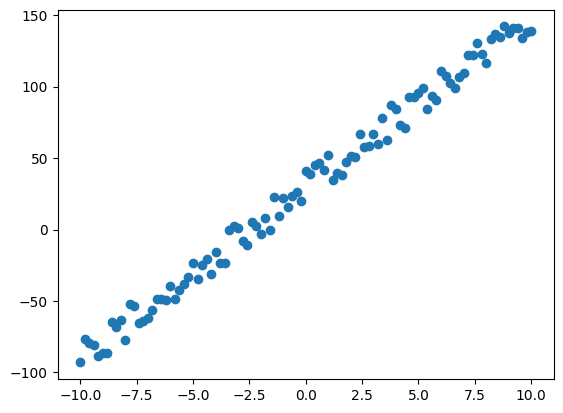

In [4]:
plt.scatter(df['X'], df['Y'])

In [5]:
X=df['X'].values.reshape(-1, 1)
y=df['Y']

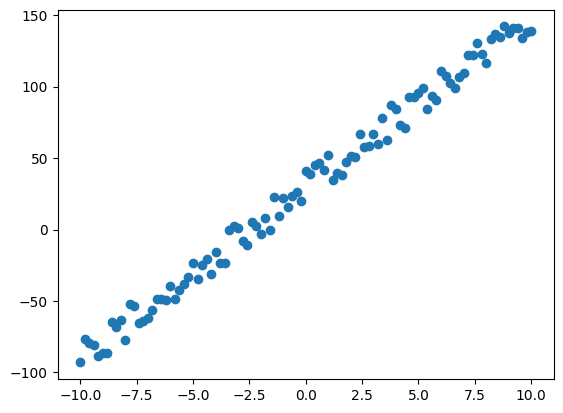

In [6]:
plt.scatter(X, y)

# Splitting data for training and testing
* Here we keep train_size=0.6 i.e. 60% of all data would be used for training machine and the rest(40%) would be kept hidden from machine
* Once the model is trained(on X_train vs y_train),  the model is now tested to predict for y values(y_pred) from test data(X_test)
* If model works good, y_pred values should be close to y_test 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state=10)

In [8]:
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(60, 1) (60,) (41, 1) (41,)


In [9]:
X_train[0][0]

6.0

# Model Construction
* First import the model from scikit learn library
* define the model
* Fit the model on the training (X_train, y_train) data
* Use trained model to predict y_pred from test (X_test) data and check

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

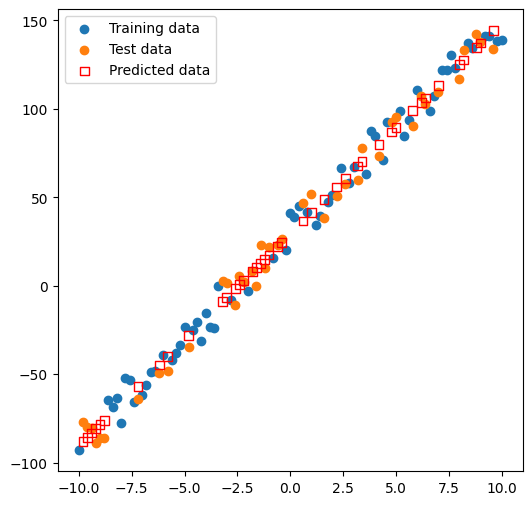

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Test data")
plt.scatter(X_test, y_pred, s=40,  marker='s', facecolors='none', edgecolors='r', label="Predicted data")
plt.legend()
plt.show()

In [12]:
# Get the coefficients 
print(model.coef_)

# Get the intercept
print(model.intercept_)


[11.98077294]
29.431858724029514


# Estimating error in model

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 6.481470594874043
MSE: 52.065547562902374
RMSE: 7.215646025332893


In [14]:
df=pd.read_csv('NonLinear_data.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head()

,X,Y
0,-10.0,609.456416
1,-9.8,561.250239
2,-9.6,535.030828
3,-9.4,518.314659
4,-9.2,460.595689


In [15]:
X=df['X'].values.reshape(-1, 1)
y=df['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(model.score(X_test, y_test))

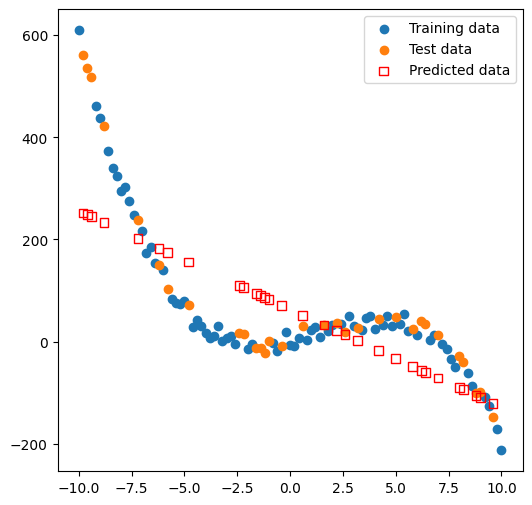

In [17]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Test data")
plt.scatter(X_test, y_pred, s=40,  marker='s', facecolors='none', edgecolors='r', label="Predicted data")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 85.98212741502589
MSE: 13465.430778863021
RMSE: 116.04064278890833


In [19]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=3)    # Model Builder with 5 nearest neighbours
model.fit(X_train, y_train)                  # The model learns the geophysics-Lithology relation from training data (Fitting)
y_pred = model.predict(X_test)  

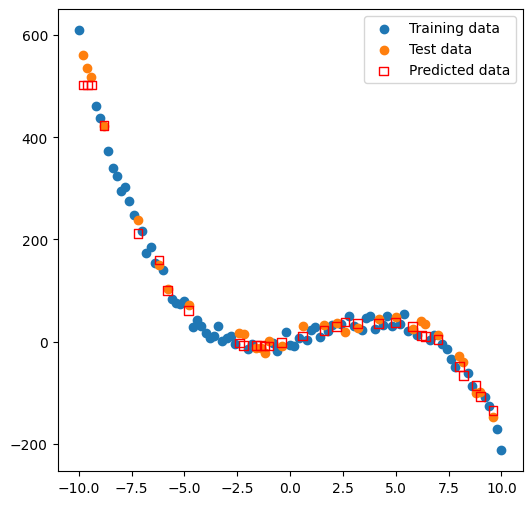

In [24]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Test data")
plt.scatter(X_test, y_pred, s=40,  marker='s', facecolors='none', edgecolors='r', label="Predicted data")
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 15.299987085798856
MSE: 362.0707985803754
RMSE: 19.02815804486539
